# EDA

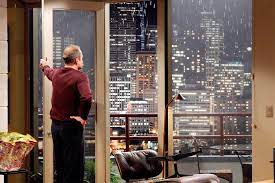

In [7]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [64]:
df = pd.read_csv('data/eda_project.csv')
df_test = pd.read_csv('data/eda_project.csv')
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

In [65]:
(df['yr_renovated'] == 0).sum()

np.int64(17005)

In [74]:
#change data types

# -- set default decimals to 2
pd.options.display.float_format = '{:.2f}'.format 

# -- set datetime type 
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')


# -- clean values for yr_renovated

# replace NaN with 0 and turn into dtype int. If not renovated: 0
df['yr_renovated'] = (
    pd.to_numeric(df['yr_renovated'], errors='coerce')  # convert invalid → NaN
      .fillna(0)                                        # replace NaN / inf
      .astype(int)                                     # convert to int
)

#divide by 10, ONE TIME
#df['yr_renovated'] = (df['yr_renovated']/10)


# -- clean values for waterfront 
df['waterfront'] = (
    pd.to_numeric(df['waterfront'], errors='coerce')  # convert invalid → NaN
      .fillna(0)                                        # replace NaN / inf
      .astype(int)                                     # convert to int
)

# -- convert to int
df['bedrooms'] = df['bedrooms'].astype(int)


df


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3,1.00,1180.00,5650.00,1.00,0,0.00,3,7,...,0.00,1955,0,98178,47.51,-122.26,1340.00,5650.00,2014-10-13,221900.00
1,6414100192,3,2.25,2570.00,7242.00,2.00,0,0.00,3,7,...,400.00,1951,1991,98125,47.72,-122.32,1690.00,7639.00,2014-12-09,538000.00
2,5631500400,2,1.00,770.00,10000.00,1.00,0,0.00,3,6,...,0.00,1933,0,98028,47.74,-122.23,2720.00,8062.00,2015-02-25,180000.00
3,2487200875,4,3.00,1960.00,5000.00,1.00,0,0.00,5,7,...,910.00,1965,0,98136,47.52,-122.39,1360.00,5000.00,2014-12-09,604000.00
4,1954400510,3,2.00,1680.00,8080.00,1.00,0,0.00,3,8,...,0.00,1987,0,98074,47.62,-122.05,1800.00,7503.00,2015-02-18,510000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530.00,1131.00,3.00,0,0.00,3,8,...,0.00,2009,0,98103,47.70,-122.35,1530.00,1509.00,2014-05-21,360000.00
21593,6600060120,4,2.50,2310.00,5813.00,2.00,0,0.00,3,8,...,0.00,2014,0,98146,47.51,-122.36,1830.00,7200.00,2015-02-23,400000.00
21594,1523300141,2,0.75,1020.00,1350.00,2.00,0,0.00,3,7,...,0.00,2009,0,98144,47.59,-122.30,1020.00,2007.00,2014-06-23,402101.00
21595,291310100,3,2.50,1600.00,2388.00,2.00,0,0.00,3,8,...,0.00,2004,0,98027,47.53,-122.07,1410.00,1287.00,2015-01-16,400000.00


In [75]:
df.isna().sum()


id                 0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view              63
condition          0
grade              0
sqft_above         0
sqft_basement    452
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
date               0
price              0
dtype: int64

<Axes: >

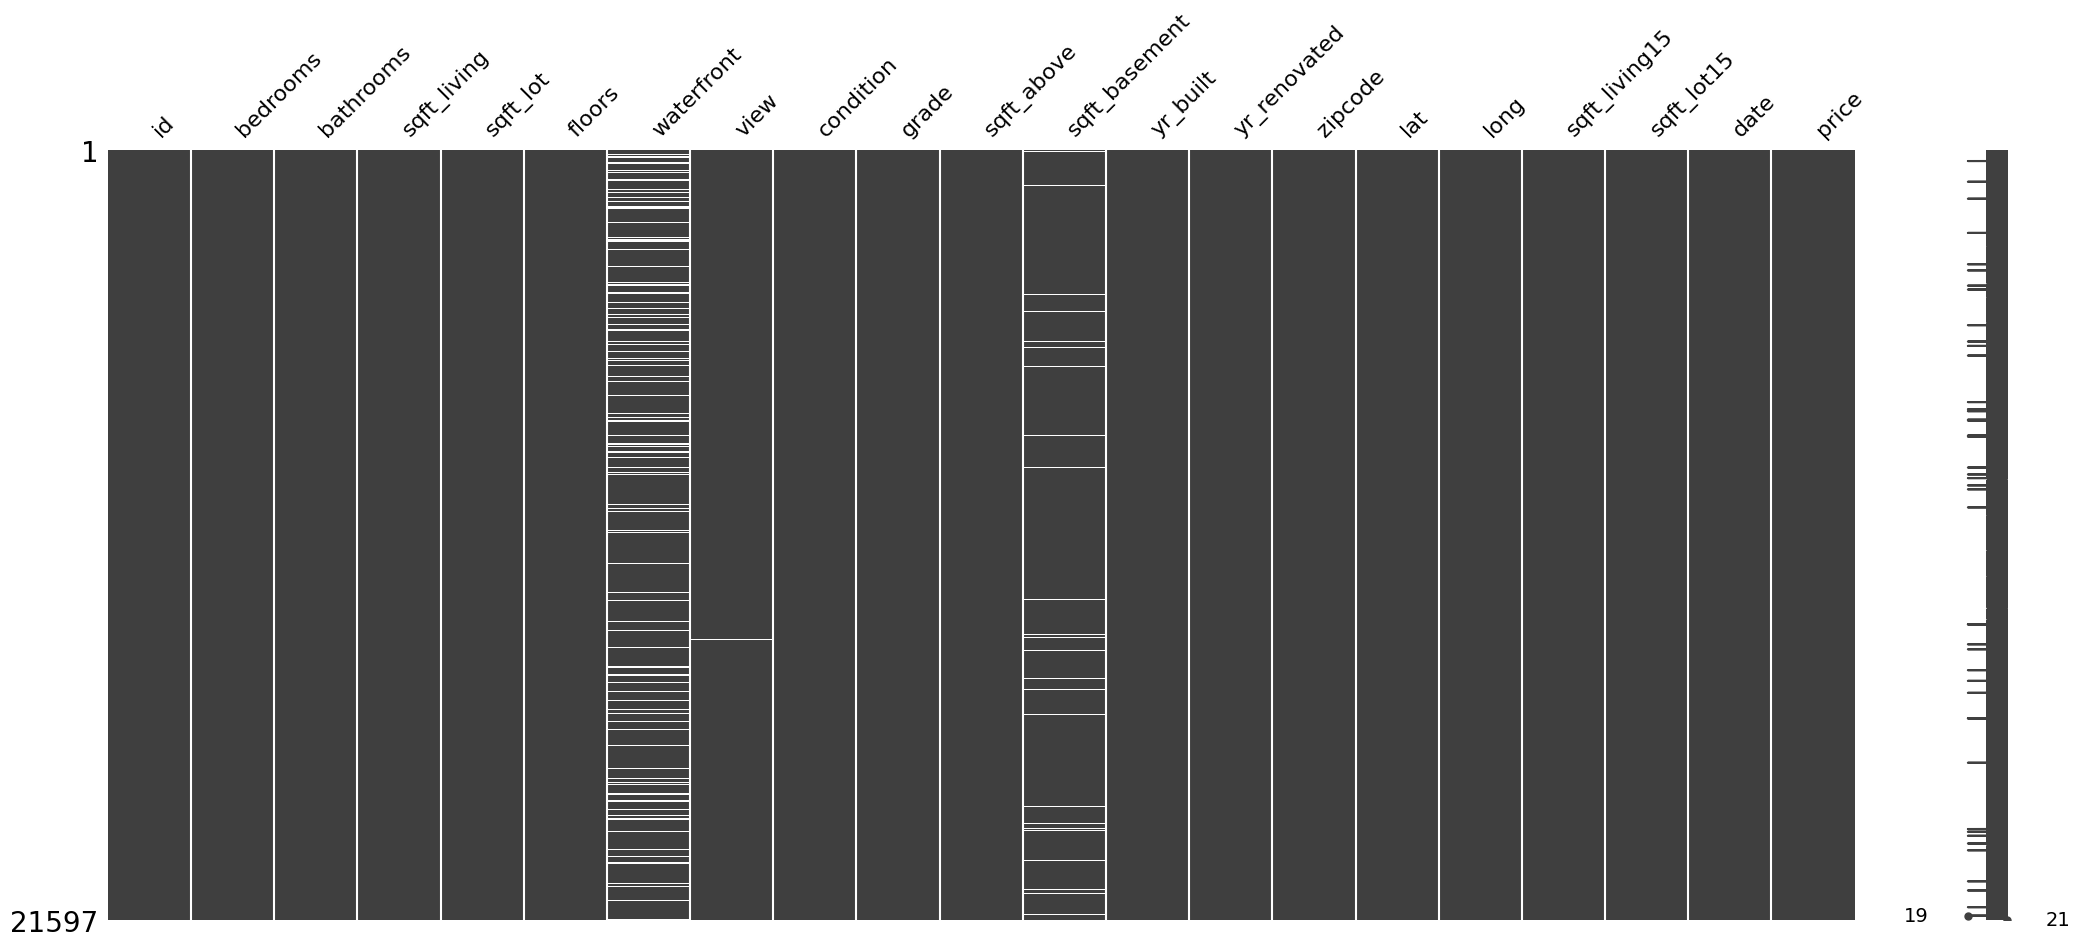

In [72]:
msno.matrix(df)